# Apparent temperature Prediction using Weather variables

In [91]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.tree import *
from sklearn import model_selection
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn import preprocessing
%matplotlib inline

In [92]:
weather = pd.read_csv('C:/Users/DELLPC/Desktop/machine learning/weather_data.csv')
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260,9.9820,0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259,9.9820,0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279,9.9820,0,1017.22,Partly cloudy throughout the day.


In [93]:
weather.shape

(5999, 12)

## Checking Null values or missing values

In [94]:
weather.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [95]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828
std,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000
50%,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000
75%,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000


In [96]:
#Categorical variables:
categorical = weather.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [97]:
#Quantitative variables:
quantitative = weather.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4FAE443C8>,
      dtype=object)

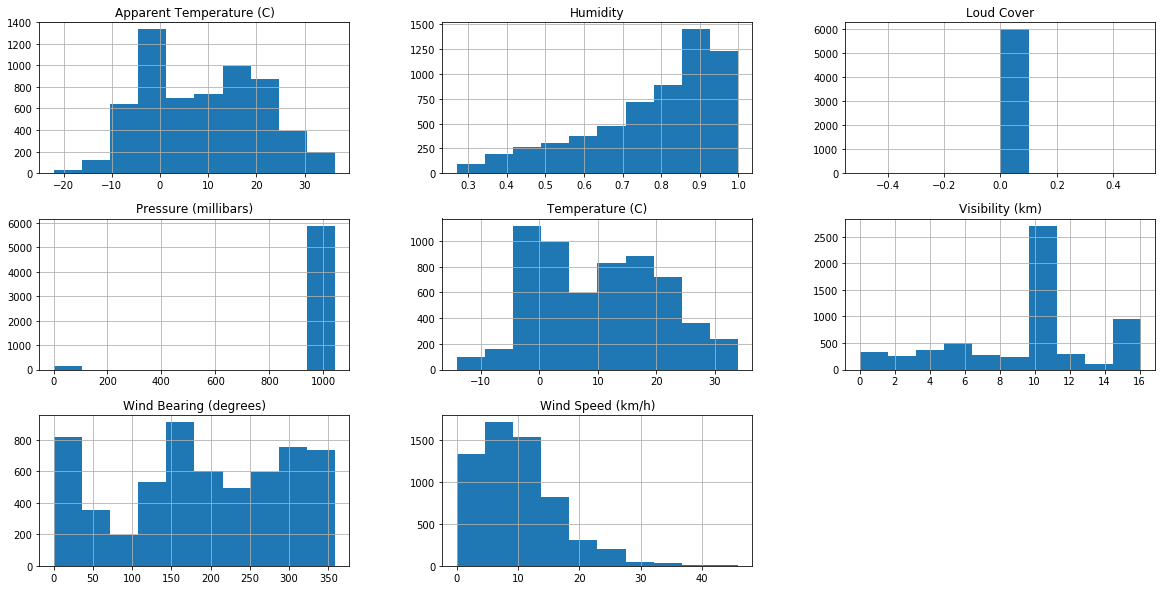

In [98]:
plt.rcParams["figure.figsize"] = 20,10
weather[quantitative].hist()

In [99]:
# 'Loud Cover' takes values zero. 
# 'Summary' and 'Daily Summary' are same things and also we are working on hourly data so we don't need Daily Summary.
# In hourly data 'Formatted Date' seems to have no role.So we drop them all:
weather = weather.drop(columns=['Loud Cover','Daily Summary','Formatted Date'],axis=1)

#### The above graph shows that weather["Pressure (millibars)"] has a few values that are 'Zero'.These values seems to be outliers and we need to fix them.

## Filling Outlier values with median.

#### 'Pressure (millibars)'
#### Some observations are zero. It seems that they are missing values. 
#### Let's fill the zeros with the median:

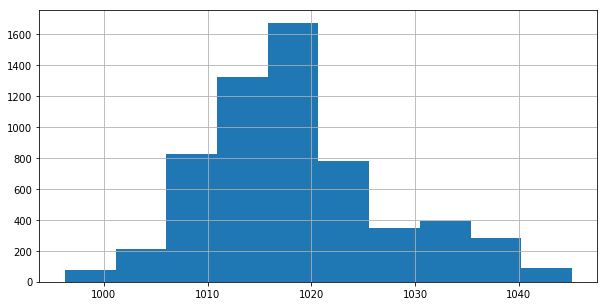

In [100]:
pressure_median = weather['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
weather["Pressure (millibars)"] = weather.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

plt.rcParams['figure.figsize'] = 10,5
weather['Pressure (millibars)'].hist()

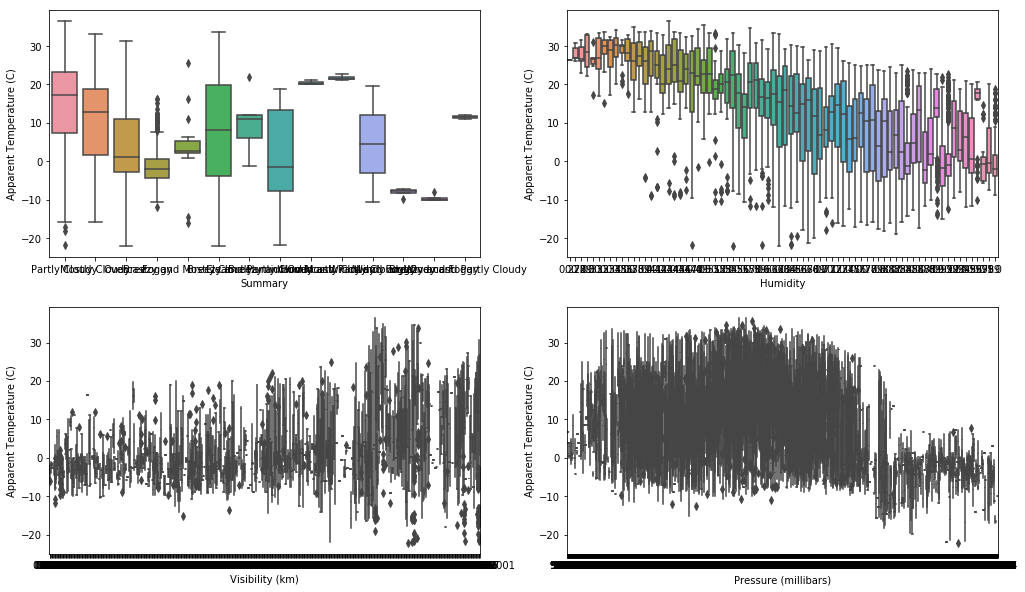

In [101]:
fig, ((a,b),(c,d))= plt.subplots(2,2, figsize=(17,10))
sns.boxplot(y='Apparent Temperature (C)',x='Summary',data=weather,ax=a)
sns.boxplot(y='Apparent Temperature (C)',x='Humidity',data=weather,ax=b)
sns.boxplot(y='Apparent Temperature (C)',x='Visibility (km)',data=weather,ax=c)
sns.boxplot(y='Apparent Temperature (C)',x='Pressure (millibars)',data=weather,ax=d)

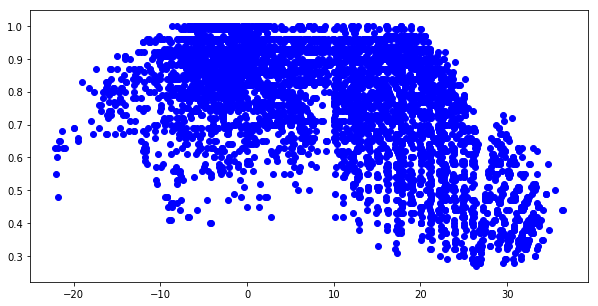

In [102]:
plt.scatter(weather["Apparent Temperature (C)"],weather["Humidity"],c="blue")

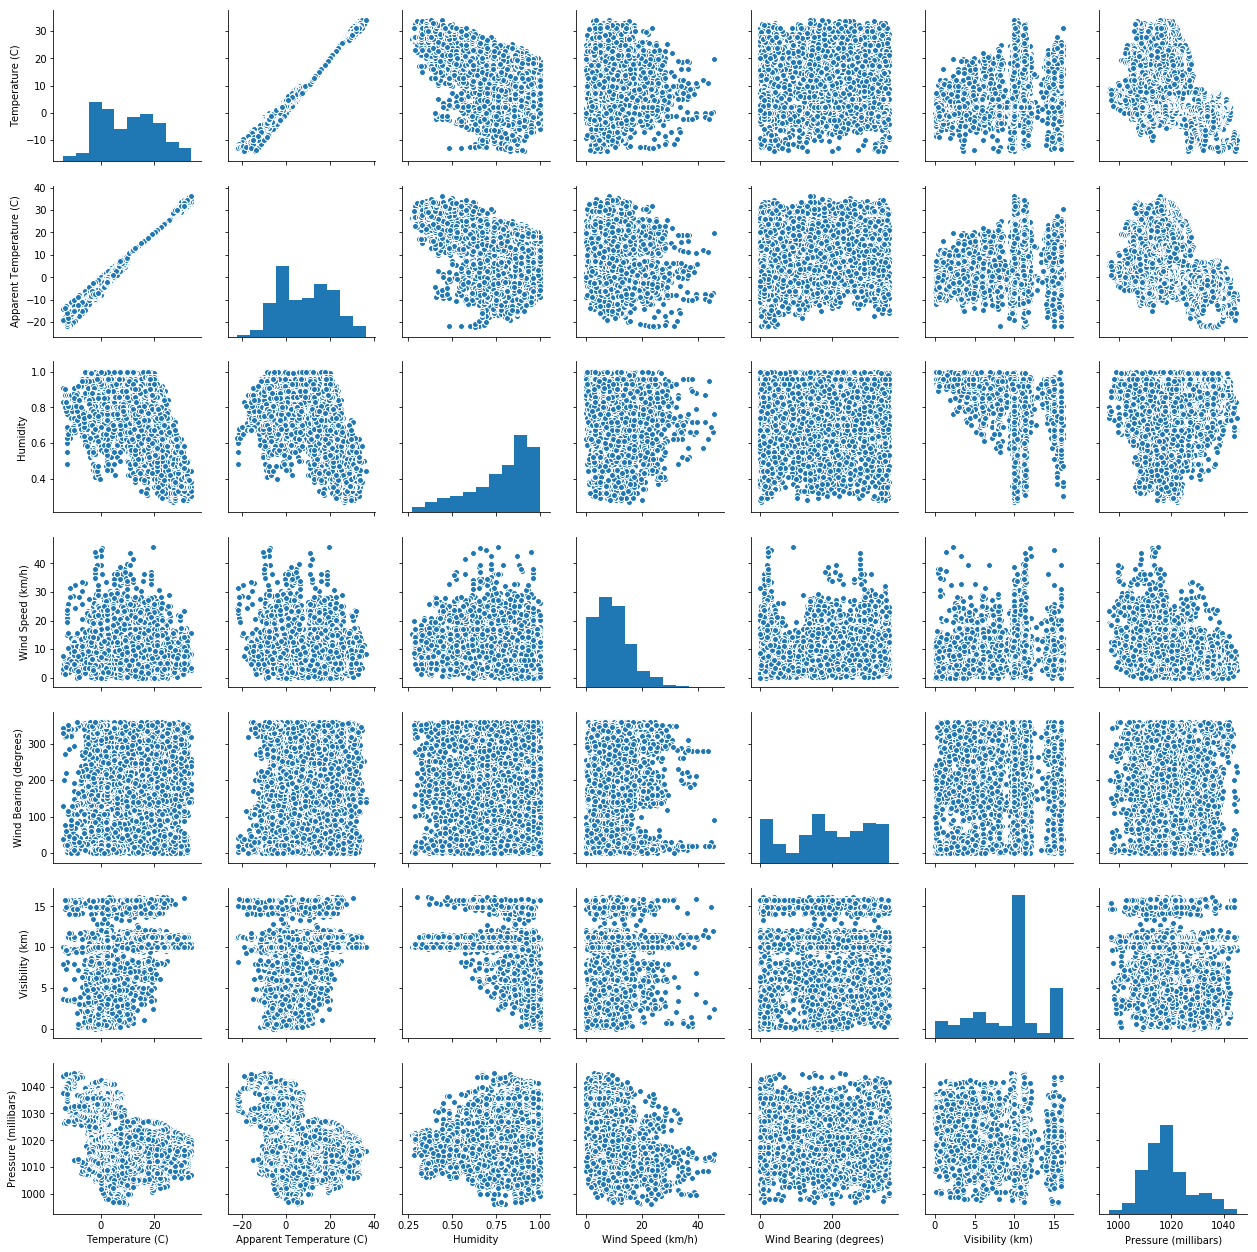

In [103]:
sns.pairplot(weather)

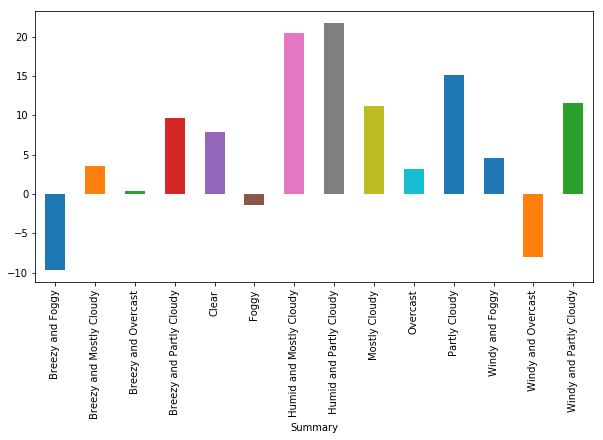

In [104]:
weather.groupby('Summary').mean()["Apparent Temperature (C)"].plot(kind='bar')

## EDA report

#### After performing EDA I came to a conclusion that features like 'Loud Cover','Formatted Date' & 'Daily Summary' had no role in the data set so I removed them.
#### The feature 'Pressure (millibars)' had some outier values so i replaced them with median.
#### And there was a feature 'Precip Type' which had categorical data that was divided into 2 categories so I converted it into numerical data i.e 1 & 0.

## Feature Engineering - I

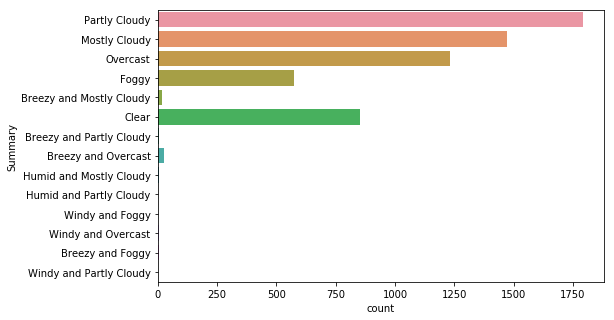

In [105]:
plt.rcParams['figure.figsize'] = 8, 5
sns.countplot(y=weather['Summary'])

In [106]:
len(weather['Summary'].unique()) #How many different 'Summary' categories are there?

14

In [107]:
summary_freq=pd.crosstab(index=weather['Summary'],columns="count")  
summary_freq_rel = summary_freq/summary_freq.sum() 
summary_freq_rel.sort_values('count', ascending=False) #relative frequencies

col_0,count
Summary,
Partly Cloudy,0.298550
Mostly Cloudy,0.245541
Overcast,0.205034
Clear,0.142190
Foggy,0.096016
Breezy and Overcast,0.004167
Breezy and Mostly Cloudy,0.003334
Breezy and Foggy,0.001167
Breezy and Partly Cloudy,0.001167


### Most common categories are: Partly Cloudy (30%), Mostly Cloudy(24%), Overcast (20%), Clear (14%), Foggy(9%) = 97% out of the total.   Moreover, these weather conditions also appear with other weather characteristics. E.g. 'Windy and Foggy'.   
### Let's create a new categorical variable: Cloud (summary) : Foggy (5), Overcast (4), Mostly Cloudy (3), Partly Cloudy (2), Clear (1), Others (0)

In [108]:
#new categorical variable:
def cloud_categorizer(row):
   row = str(row).lower()
   category = ""
   if "foggy" in row:
       category = 5
   elif "overcast" in row:
       category = 4
   elif "mostly cloudy" in row:
       category = 3
   elif "partly cloudy" in row:
       category = 2
   elif "clear" in row:
       category = 1
   else:
       category = 0
   return category 

weather["Summary"] = weather.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)

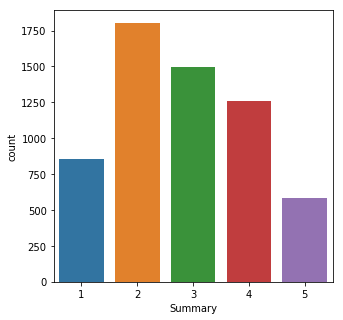

In [109]:
plt.rcParams['figure.figsize'] = 5, 5
sns.countplot(weather['Summary'])

In [110]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,3,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,3,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
5,2,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66
6,2,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72
7,2,rain,8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84
8,2,rain,10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37
9,2,rain,13.772222,13.772222,0.72,12.5258,279,9.9820,1017.22


In [111]:
weather["Precip Type"].value_counts()

rain    4762
snow    1237
Name: Precip Type, dtype: int64

#### 'Precip Type' consists of 2 types of data i.e 'rain' & 'snow'. So we convert them into 1 and 0 respectively.

In [112]:
weather["Precip Type"] = np.where(weather["Precip Type"]=="rain",'1','0')
weather["Precip Type"] = weather["Precip Type"].astype(dtype='int64')
weather.head(10)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2,1,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2,1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,3,1,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2,1,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,3,1,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
5,2,1,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66
6,2,1,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72
7,2,1,8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84
8,2,1,10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37
9,2,1,13.772222,13.772222,0.72,12.5258,279,9.9820,1017.22


# Visualizing various features and correlations between them

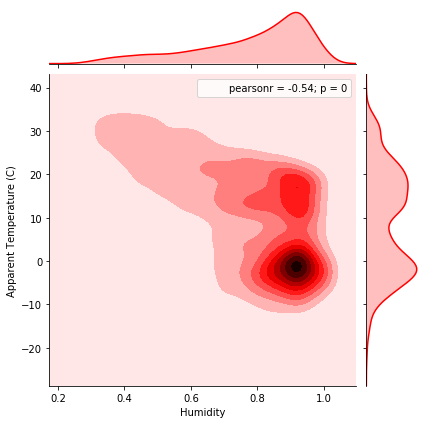

In [113]:
sns.jointplot(weather['Humidity'],weather['Apparent Temperature (C)'],kind='kde',color='r',data=weather)

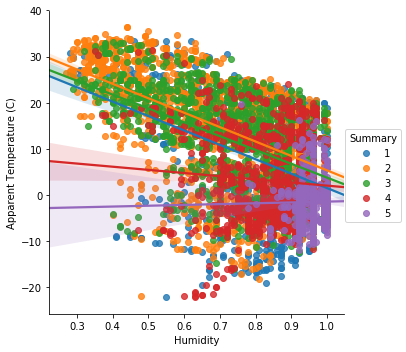

In [114]:
sns.lmplot(x="Humidity", y="Apparent Temperature (C)", data=weather, hue="Summary")

### Corelation using Heat Map

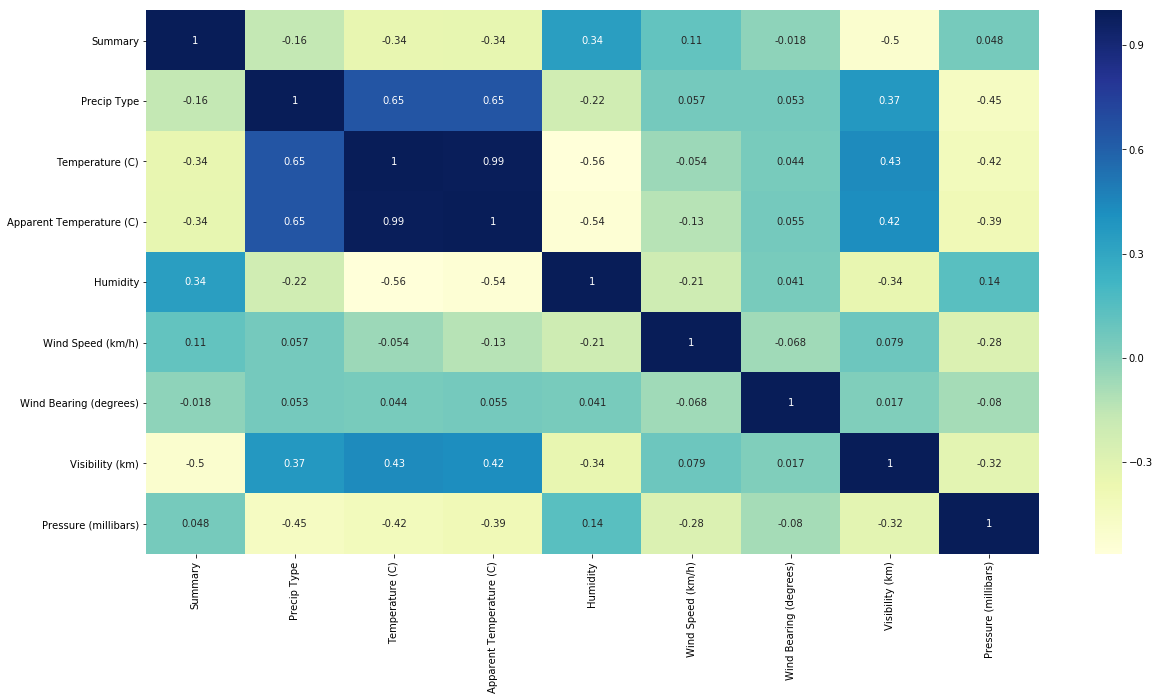

In [115]:
corr = weather.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="YlGnBu",annot=True)

# Feature Engineering - II

### Normalization

In [116]:
weather = (weather-weather.mean())/(weather.max()-weather.min())
weather.head(10)
# weather.drop(columns="Precip Type",axis=1).head(10)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-0.204992,0.206201,-0.015500,-0.026836,0.151386,0.089528,0.168943,0.394374,-0.066422
1,-0.204992,0.206201,-0.017926,-0.029591,0.110290,0.092683,0.191227,0.394374,-0.056197
2,0.045008,0.206201,-0.017464,0.007165,0.151386,-0.132343,0.038024,0.340374,-0.049857
3,-0.204992,0.206201,-0.040105,-0.051530,0.069194,0.089178,0.219082,0.394374,-0.040246
4,0.045008,0.206201,-0.030401,-0.033864,0.069194,0.022581,0.191227,0.394374,-0.038201
5,-0.204992,0.206201,-0.020698,-0.031585,0.096591,0.086023,0.188441,0.340374,-0.035133
6,-0.204992,0.206201,-0.051656,-0.058748,0.233578,0.051323,0.191227,0.031374,-0.033906
7,-0.204992,0.206201,-0.030055,-0.041557,0.151386,0.090229,0.194012,0.031374,-0.031452
8,-0.204992,0.206201,0.012570,0.031859,0.055496,0.028540,0.191227,0.031374,-0.020614
9,-0.204992,0.206201,0.073907,0.082291,-0.081491,0.054828,0.246937,0.031374,-0.023681


In [117]:
weather.var()

Summary                     0.089817
Precip Type                 0.163709
Temperature (C)             0.048260
Apparent Temperature (C)    0.041552
Humidity                    0.056196
Wind Speed (km/h)           0.020251
Wind Bearing (degrees)      0.088878
Visibility (km)             0.062923
Pressure (millibars)        0.032140
dtype: float64

#### Separating the feature that needs to be predicted so that it does not get excluded from the main dataset during performing VarianceThreshold. 

In [118]:
weather = pd.DataFrame(weather)
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-0.204992,0.206201,-0.015500,-0.026836,0.151386,0.089528,0.168943,0.394374,-0.066422
1,-0.204992,0.206201,-0.017926,-0.029591,0.110290,0.092683,0.191227,0.394374,-0.056197
2,0.045008,0.206201,-0.017464,0.007165,0.151386,-0.132343,0.038024,0.340374,-0.049857
3,-0.204992,0.206201,-0.040105,-0.051530,0.069194,0.089178,0.219082,0.394374,-0.040246
4,0.045008,0.206201,-0.030401,-0.033864,0.069194,0.022581,0.191227,0.394374,-0.038201
5,-0.204992,0.206201,-0.020698,-0.031585,0.096591,0.086023,0.188441,0.340374,-0.035133
6,-0.204992,0.206201,-0.051656,-0.058748,0.233578,0.051323,0.191227,0.031374,-0.033906
7,-0.204992,0.206201,-0.030055,-0.041557,0.151386,0.090229,0.194012,0.031374,-0.031452
8,-0.204992,0.206201,0.012570,0.031859,0.055496,0.028540,0.191227,0.031374,-0.020614
9,-0.204992,0.206201,0.073907,0.082291,-0.081491,0.054828,0.246937,0.031374,-0.023681


In [119]:
a = weather["Apparent Temperature (C)"]
weather = weather.drop(columns="Apparent Temperature (C)",axis=1)

### Variance Threshold

In [120]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.02)
weather = selector.fit_transform(weather)
weather.shape

(5999, 8)

## Now splitting dataset for Linear Regression

In [140]:
X = weather
Y = a

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

### Linear Regression

In [196]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [197]:
y_pred = model.predict(X_test)
y_pred

array([-0.11767412, -0.39743429, -0.02496859, ..., -0.20268146,
        0.10972833, -0.24335316])

In [198]:
y = pd.DataFrame.from_dict({'Actual':y_test,'Predicted':y_pred})
y.head(10)

,Actual,Predicted
2007,-0.133019,-0.117674
3285,-0.346525,-0.397434
2100,-0.031205,-0.024969
3198,-0.199787,-0.232767
2904,-0.173764,-0.202899
555,0.024926,-0.011110
5500,-0.212039,-0.191067
532,-0.024842,-0.032920
5649,0.054178,0.002190
1539,-0.129695,-0.148787


In [199]:
model.score(X_test,y_test)*100

99.15880538198583

In [200]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))

0.00033756248878405524


In [201]:
print(metrics.mean_absolute_error(y_test,y_pred))

0.014601697307076354


In [202]:
metrics.r2_score(y_test,y_pred)

0.9915880538198584

In [203]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.018372873721442032


## Random Forest Regressor

In [204]:
rfr = RandomForestRegressor(n_estimators=10,max_depth=6,random_state=42).fit(X_train,y_train)
results = model_selection.cross_val_score(rfr, X_test,y_test)
results.mean()*100

99.74361673987536

## Gradient Boosting Regressor

In [205]:
gbr = GradientBoostingRegressor(n_estimators=50)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [206]:
pred = gbr.predict(X_test)

In [207]:
y = pd.DataFrame.from_dict({'Actual':y_test,'Predicted':pred})
y.head(10)

,Actual,Predicted
2007,-0.133019,-0.128416
3285,-0.346525,-0.342340
2100,-0.031205,-0.033551
3198,-0.199787,-0.205072
2904,-0.173764,-0.174608
555,0.024926,0.020700
5500,-0.212039,-0.205077
532,-0.024842,-0.040469
5649,0.054178,0.046403
1539,-0.129695,-0.138460


In [208]:
gbr.score(X_test,y_test)*100

99.88121598796727

In [209]:
print(metrics.mean_squared_error(y_test,pred))

4.766676565785182e-05


In [210]:
print(metrics.mean_absolute_error(y_test,pred))

0.0043794740489565935


In [211]:
metrics.r2_score(y_test,pred)

0.9988121598796726

In [212]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

0.006904112228074789


## Result
Accuracy score of different regression model are:

Linear Regression : 99.15

Random Forest Regression : 99.74

Gradient Boosting Regressor: 99.88(Maximum)
